# **HOMEWORK 3 - CLASSIFICAÇÃO**


---



> Classificador: *LDA*

> Dataset: *Wine Quality*

> Codigo: Patrícia

---





```
# BIBLIOTECAS
```



In [1]:
import pandas             as pd
import numpy              as np
import matplotlib.pyplot  as plt
import seaborn            as sn

        # Normalização #
#from scipy.stats import norm
from sklearn.preprocessing import StandardScaler

       # Classificadores
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

       # Treinamento e Teste ; Acuracia #
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

       # Validação Cruzada #
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


      # Matriz de confusao #
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score



In [2]:
wine = pd.read_csv('https://raw.githubusercontent.com/xToshiro/homework-ICA/main/winequality-white.csv', sep=";")

y = wine['quality']
x = wine.drop(columns=['quality' ])





```
# NORMALIZAÇÃO DOS DADOS
```




In [3]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(x)

#print(X_normalized)




```
# DIVISÃO TREINO E TESTE
```



In [4]:
# Conjunto de dados normalizado em treinamento e teste (75% treinamento, 25% teste)
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.25, random_state=42)

# Salvando os conjuntos de treinamento e teste normalizados em arquivos CSV
pd.DataFrame(X_train, columns=x.columns).to_csv('treino_norm.csv', index=False)
pd.DataFrame(X_test, columns=x.columns).to_csv('teste_norm.csv', index=False)

# Salvando os rótulos (y) em arquivos CSV
pd.DataFrame(y_train).to_csv('y_treino.csv', index=False, header=['quality'])
pd.DataFrame(y_test).to_csv('y_teste.csv', index=False, header=['quality'])


In [5]:
y_train = pd.read_csv('y_treino.csv')
y_test  = pd.read_csv('y_teste.csv')

train_norm = pd.read_csv('treino_norm.csv')
test_norm  = pd.read_csv('teste_norm.csv')

"""
print('y_train:', y_train)
print('------------------')
print('y_test:' ,y_test)
print('------------------')
print('train_norm:', train_norm)
print('------------------')
print('test_norm:', test_norm)

"""

"\nprint('y_train:', y_train)\nprint('------------------')\nprint('y_test:' ,y_test)\nprint('------------------')\nprint('train_norm:', train_norm)\nprint('------------------')\nprint('test_norm:', test_norm)\n\n"

```
# VALIDAÇÃO CRUZADA
```



In [6]:
train_norm = pd.read_csv('treino_norm.csv')
y_train = pd.read_csv('y_treino.csv')['quality']

model = LinearDiscriminantAnalysis()

# Validação cruzada no conjunto de treinamento normalizado
cv_scores = cross_val_score(model, train_norm, y_train, cv=5)

# Validação cruzada
print("Scores de validação cruzada:", cv_scores)
print("Média dos scores de validação cruzada:", cv_scores.mean())

Scores de validação cruzada: [0.54285714 0.5292517  0.54965986 0.55585831 0.54223433]
Média dos scores de validação cruzada: 0.5439722701069528


In [7]:
##############################

In [8]:
# Treinando o modelo no conjunto de treinamento completo
model.fit(train_norm, y_train)

# Fazendo previsões no conjunto de teste
y_pred = model.predict(test_norm)

# Acurácia
acc = accuracy_score(y_test, y_pred)

print('Acuracia: {:.2f}%'.format(acc*100))

 # Precisão
precision_lda = precision_score(y_test, y_pred ,average ='macro' ,pos_label="pos")
print('Precisão: {:.2f}%'.format(precision_lda*100))

      # Sensibilidade / Recall
recall = recall_score(y_test, y_pred ,average ='macro' ,pos_label="pos")
print('Recall: {:.2f}%'.format(recall*100))


Acuracia: 51.51%
Precisão: 40.64%
Recall: 26.49%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'pos') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'pos') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




```
# MATRIZ DE CONFUSÃO
```



In [9]:
# Matriz de confusão
print('Matriz de confusao: ')
print(confusion_matrix(y_test, y_pred))

Matriz de confusao: 
[[  1   0   3   3   0   0   0]
 [  0   8   9  15   0   0   0]
 [  0  13 176 166   2   1   0]
 [  0   5 106 381  51   0   1]
 [  0   0  20 156  65   0   0]
 [  0   1   1  23  18   0   0]
 [  0   0   0   0   0   0   0]]


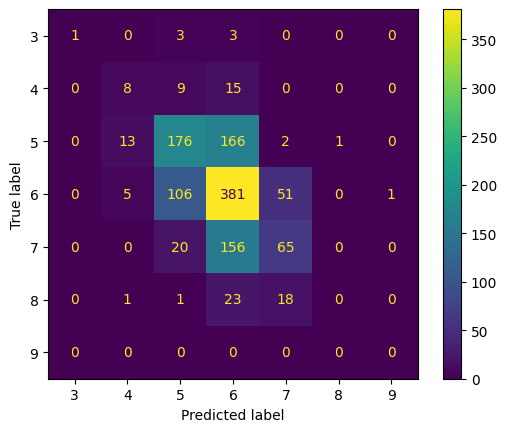

              precision    recall  f1-score   support

           3      1.000     0.143     0.250         7
           4      0.296     0.250     0.271        32
           5      0.559     0.492     0.523       358
           6      0.512     0.700     0.592       544
           7      0.478     0.270     0.345       241
           8      0.000     0.000     0.000        43
           9      0.000     0.000     0.000         0

    accuracy                          0.515      1225
   macro avg      0.406     0.265     0.283      1225
weighted avg      0.498     0.515     0.492      1225



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [10]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

print(classification_report(y_test, y_pred, digits=3))




```
# PLOT
```




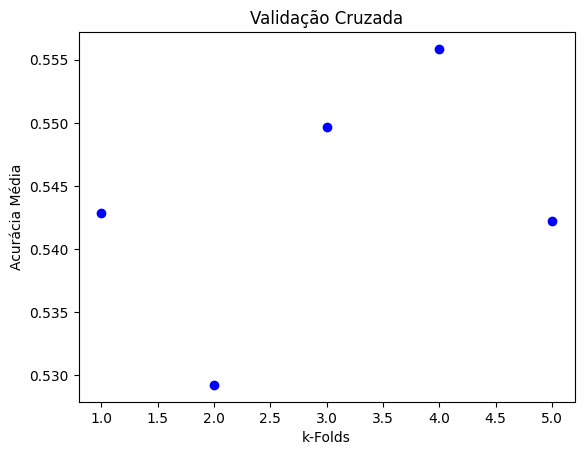

In [11]:
# Scatterplot dos scores da validação cruzada
plt.scatter(range(1, len(cv_scores) + 1), cv_scores, color='blue')
plt.title('Validação Cruzada')
plt.xlabel('k-Folds')
plt.ylabel('Acurácia Média')
plt.show()

In [12]:
"""
sn.scatterplot(x='density', y='residual sugar', hue='quality', data=wine, )
plt.legend(bbox_to_anchor=(1, 1), loc=2)

plt.show()

"""

"\nsn.scatterplot(x='density', y='residual sugar', hue='quality', data=wine, )\nplt.legend(bbox_to_anchor=(1, 1), loc=2)\n\nplt.show()\n\n"